In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [4]:
# from google.colab import files
# uploaded = files.upload()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv('/content/drive/MyDrive/datasets/homeprices_banglore.csv')

In [7]:
df.sample(5)


,area,bedrooms,price
6,2732,4,135.0
14,2250,3,101.0
5,1170,2,38.0
3,1521,3,75.0
18,2770,3,102.0


In [8]:
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

Scaled_X = sx.fit_transform(df.drop('price',axis=1))
Scaled_Y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
Scaled_X
Scaled_Y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

**BATCH GRADIENT DESCENT**

In [9]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w=w-learning_rate * w_grad
        b = b - learning_rate * b_grad
        cost = np.mean(np.square(y_true - y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

In [10]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(Scaled_X,Scaled_Y.reshape(Scaled_Y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

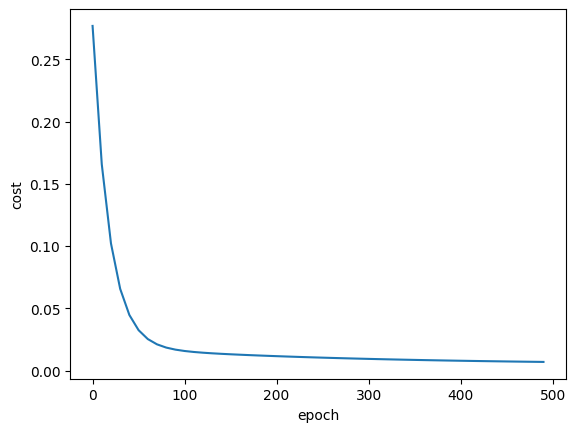

In [11]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [12]:
sx.transform([[2400,4]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.55172414, 0.75      ]])

In [13]:
def predict(area, bedrooms, w, b):
  scaled_x = sx.transform([[area,bedrooms]])[0]
  scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]


In [14]:
predict(2400,4,w,b)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(121.87126977240116)

**STOCHASTIC GRADIENT DESCENT**

In [15]:
import random

In [16]:
def stochastic_gradient_descent(X,y_true, epochs, learning_rate=0.01):
  number_of_features= X.shape[1]
  w=np.ones(shape=number_of_features)
  b=0
  total_samples = X.shape[0]

  cost_list=[]
  epoch_list=[]

  for i in range(epochs):
    random_index = random.randint(0, total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]
    y_predicted = np.dot(w, sample_x.T) + b

    # w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
    # b_grad = -(2/total_samples)*(sample_y-y_predicted)

    w_grad = -2 * (sample_y - y_predicted) * sample_x
    b_grad = -2 * (sample_y - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = (sample_y - y_predicted)**2


    if i%100==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list


In [17]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(Scaled_X,Scaled_Y.reshape(Scaled_Y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.84312109, 0.31847389]),
 np.float64(-0.09833304361804447),
 np.float64(0.0029417487837100306))

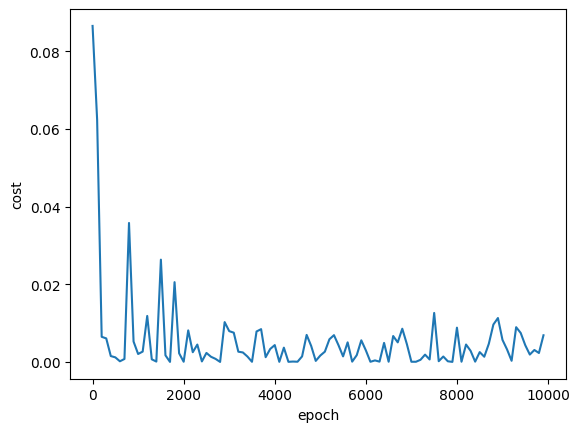

In [18]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [19]:
def predict_sgd(area,bedrooms,w_sgd,b_sgd):
  scaled_x = sx.transform([[area,bedrooms]])[0]
  predicted_price = w_sgd[0]*scaled_x[0] + w_sgd[1]*scaled_x[1] + b_sgd
  return sy.inverse_transform([[predicted_price]])

In [20]:
predict_sgd(2600,4,w_sgd,b_sgd)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[121.61825278]])

**MIN BATCH GRADIENT DESCENT**

In [40]:
def min_batch_gradient_descent(Scaled_X,Scaled_Y,epochs,learning_rate=0.01,batch_size=10):
  feature_count = Scaled_X.shape[1]
  w = np.ones(shape=feature_count)
  b = 0
  total_samples=Scaled_X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_indices = random.sample(range(0,total_samples),batch_size)
    X = Scaled_X[random_indices]
    y_true=Scaled_Y[random_indices]

    y_predicted = np.dot(w, X.T) + b

    w_grad = -(2/batch_size)*(X.T.dot(y_true-y_predicted))
    b_grad = -(2/batch_size)*np.sum(y_true - y_predicted)

    w -= learning_rate*w_grad
    b -= learning_rate*b_grad

    cost = np.mean(np.square(y_true - y_predicted))

    if i%100==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list


In [41]:
w_min, b_min, cost_min, cost_list_min, epoch_list_min = min_batch_gradient_descent(Scaled_X,Scaled_Y.reshape(Scaled_Y.shape[0],),10000)
w_min, b_min, cost_min

(array([0.84011335, 0.30633369]),
 np.float64(-0.09580277821293304),
 np.float64(0.0040192202021429296))

In [43]:
predict(2400,4,w_min,b_min)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(112.6568710702184)

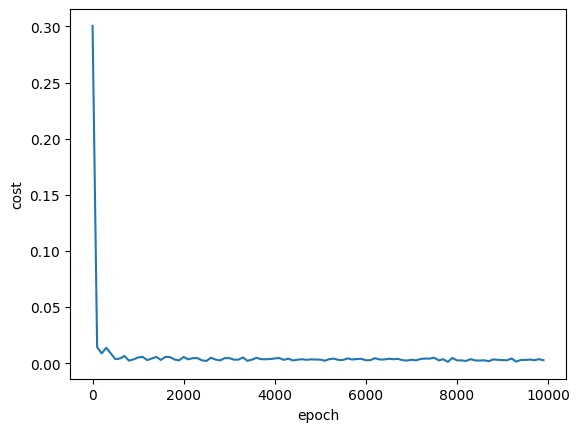

In [44]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_min,cost_list_min)